<a href="https://colab.research.google.com/github/ChintaLokesh/Deep_Learning_Neural_Network/blob/master/NN_CAT_AND_DOGS_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import kaggle

In [5]:
# ! mv /content/kaggle.json /root/.kaggle

In [6]:
# import kaggle

In [7]:
! kaggle competitions download -c dogs-vs-cats

 98% 794M/812M [00:05<00:00, 191MB/s]
100% 812M/812M [00:05<00:00, 161MB/s]


In [8]:
! unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [9]:
! unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [10]:
import os 
os.listdir("/content/train")

['dog.9783.jpg',
 'cat.6824.jpg',
 'dog.3992.jpg',
 'cat.6793.jpg',
 'dog.4758.jpg',
 'cat.7603.jpg',
 'cat.1881.jpg',
 'dog.1914.jpg',
 'cat.5149.jpg',
 'cat.10777.jpg',
 'dog.10180.jpg',
 'cat.9800.jpg',
 'dog.5813.jpg',
 'cat.12467.jpg',
 'dog.1756.jpg',
 'cat.5975.jpg',
 'cat.1552.jpg',
 'cat.9456.jpg',
 'dog.6477.jpg',
 'dog.11324.jpg',
 'dog.8614.jpg',
 'dog.5659.jpg',
 'cat.1251.jpg',
 'cat.3722.jpg',
 'dog.7038.jpg',
 'dog.11627.jpg',
 'dog.783.jpg',
 'dog.12421.jpg',
 'cat.3481.jpg',
 'cat.955.jpg',
 'dog.9852.jpg',
 'cat.2857.jpg',
 'cat.1203.jpg',
 'dog.3307.jpg',
 'cat.10451.jpg',
 'cat.5949.jpg',
 'dog.1523.jpg',
 'dog.3247.jpg',
 'dog.10729.jpg',
 'cat.11135.jpg',
 'cat.6300.jpg',
 'dog.2342.jpg',
 'cat.6040.jpg',
 'cat.9853.jpg',
 'dog.12242.jpg',
 'cat.978.jpg',
 'dog.11318.jpg',
 'cat.7207.jpg',
 'cat.3591.jpg',
 'dog.11340.jpg',
 'dog.2383.jpg',
 'cat.10393.jpg',
 'cat.4731.jpg',
 'dog.11660.jpg',
 'cat.2162.jpg',
 'cat.386.jpg',
 'cat.3740.jpg',
 'cat.3398.jpg',
 'do

In [11]:
import cv2

In [12]:
x_train=[]
y_train=[]
for file in os.listdir("/content/train"):
  image=cv2.imread("train/"+file)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image=cv2.resize(image,(150,150))
  x_train.append(image)
  if "cat" in file:
    y_train.append("Cat")
  else:
    y_train.append("Dog")

In [13]:
type(x_train)

list

In [14]:
len(x_train)

25000

In [15]:
import numpy as np

In [16]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [17]:
x_train.shape

(25000, 150, 150, 3)

In [18]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.90)

In [20]:
x_train.shape

(2500, 150, 150, 3)

In [21]:
y_train.shape

(2500,)

In [22]:
y_train

array(['Cat', 'Dog', 'Cat', ..., 'Cat', 'Dog', 'Cat'], dtype='<U3')

In [23]:
y_train=np.where(y_train == 'Cat',1,0)

In [64]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [24]:
x_train =x_train/255.0
y_train= tf.keras.utils.to_categorical(y_train)

In [65]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [26]:
model=tf.keras.models.Sequential()

In [27]:
model.add(tf.keras.layers.Input((150,150,3),name="Input"))
model.add(tf.keras.layers.Flatten(name="Flatten"))
# model.add(tf.keras.layers.Flatten(name="Flatten"))
model.add(tf.keras.layers.Dense(100,activation=tf.keras.activations.relu,name = "Hidden_Layer"))
model.add(tf.keras.layers.Dense(2,activation=tf.keras.activations.softmax,name="Output_layer"))

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 67500)             0         
                                                                 
 Hidden_Layer (Dense)        (None, 100)               6750100   
                                                                 
 Output_layer (Dense)        (None, 2)                 202       
                                                                 
Total params: 6,750,302
Trainable params: 6,750,302
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.SGD(),metrics=["acc"])

In [29]:
model.fit(x_train,y_train,epochs=5,batch_size=16)

Epoch 1/5
157/157 [==============================] - 6s 36ms/step - loss: 0.8722 - acc: 0.5308
Epoch 2/5
157/157 [==============================] - 4s 27ms/step - loss: 0.6861 - acc: 0.5508
Epoch 3/5
157/157 [==============================] - 4s 27ms/step - loss: 0.6790 - acc: 0.5804
Epoch 4/5
157/157 [==============================] - 5s 34ms/step - loss: 0.6693 - acc: 0.5924
Epoch 5/5
157/157 [==============================] - 4s 27ms/step - loss: 0.6637 - acc: 0.5996


In [30]:
model.save("dogsVsCats")

In [ ]:
def predict(num):
  plt.imshow(x_test[num])
  image=x_test[num]
  image=image /255.0
  image=np.expand_dims(image,axis=0)
  result=model.predict(image)

  print(f"Model predicted : {np.argmax(result)} with confidence of {np.round(result.max() *100 ,2)} %")
  print(f"corrrect label is {y_test[num]}")

In [39]:
import matplotlib.pyplot as plt

In [45]:
y_test[1][0]

0.0

In [61]:
def predict(num):
  plt.imshow(x_test[num])
  if(y_test[num][0] == 1):
    print(f"actual Label for {y_test[num][0]} is CAT")
  else:
    print(f"actual Label for {y_test[num][0]} is DOG")
  image=x_test[num]
  image=image /255.0
  image=np.expand_dims(image,axis=0)
  result=model.predict(image)
  print(f"result is:{result}")                               
  print(f"model predicted : {np.argmax(result)} with confidence of {np.round(result.max()*100,2)}")

In [33]:
y_test=np.where(y_test == "Cat",1,0)

In [34]:
# x_test =x_test/255.0
y_test= tf.keras.utils.to_categorical(y_test)

In [35]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [37]:
x_test.shape

(22500, 150, 150, 3)

actual Label for 1.0 is CAT
1/1 [==============================] - 0s 25ms/step
result is:[[0.34606963 0.65393037]]
model predicted : 1 with confidence of 65.39


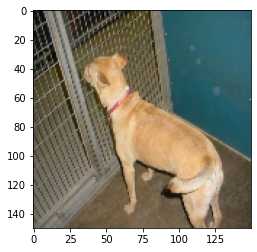

In [62]:
predict(112)

actual Label for 0.0 is DOG
1/1 [==============================] - 0s 109ms/step
result is:[[0.5137052  0.48629472]]
model predicted : 0 with confidence of 51.37


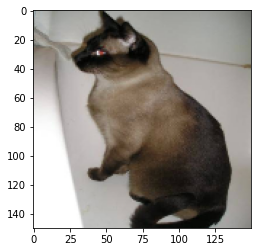

In [63]:
predict(567)